# Black Hole Evaporation

## Hawking Radiation
In 1974, Stephen Hawking proposed that the quantum effects of uncertainty near the event horizon of a black hole cause it to radiate energy from the inside and this radiation has a black body temperature 

$$T_H=\frac{\hbar c^3}{8\pi G M k_b}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import math

G=6.67e-11*(u.m**3*u.kg**-1*u.s**-2)
hbar=1.05e-34*(u.kg*u.m**2*u.s**-1)
c=3e8*(u.m/u.s)
kb=1.38e-23*(u.kg*u.m**2*u.s**-2/u.K)

def hawking_temperature(M):
    return (hbar*c**3)/(8*math.pi*G*kb*M)

Due to the inverse relationship between the Hawking Temperature and the mass, as the black hole energy is evaporated, the mass decreases, which leads to an increasing temperature. We can use the classic Stefan-Boltzman equation to find the luminosity of a black hole with size Schwarzschild radius.

$$L=\sigma A T^4$$
with $$R_s=\frac{2 G M}{c}$$


Following through the derivation you arrive at the Bekenstein-Hawking Luminosity

$$-\frac{dE}{dt}=\frac{\hbar c^6}{15360\pi G^2M^2}$$

In [9]:
sigma=5.67e-8*(u.W*u.m**-2*u.K**-4)

def schwarzschild_radius(M):
    return (2*G*M)/(c**2)

def bekenstein_hawking_luminosity(M):
    return sigma*(4*math.pi*schwarzschild_radius(M)**2)*hawking_temperature(M)**4

## Mass Decay
As the black hole radiates it's energy, it loses mass. We must assume that the black hole is in a vacuum and there is no matter close enough to fall in the future. For convenience, the constants will be turned into a new constant $\alpha$

$$\alpha=3.56\times 10^{32} \frac{kg^3m^2}{s^3}$$
$$\frac{-dE}{dt}=\frac{\alpha}{M^2}$$
$$M^2dE=-\alpha dt$$
$$E=Mc^2 \implies dE=dMc^2$$
$$\int_{M_0}^{M(t)} M^2dM=\int_{0}^{t} -\frac{\alpha}{c^2}dt$$
$$\frac{M(t)^3-M_0^3}{3}=-\frac{\alpha t}{c^2}$$
$$M(t)=M_0(1-\frac{3\alpha}{c^2M_0^3}t)^{1/3}$$

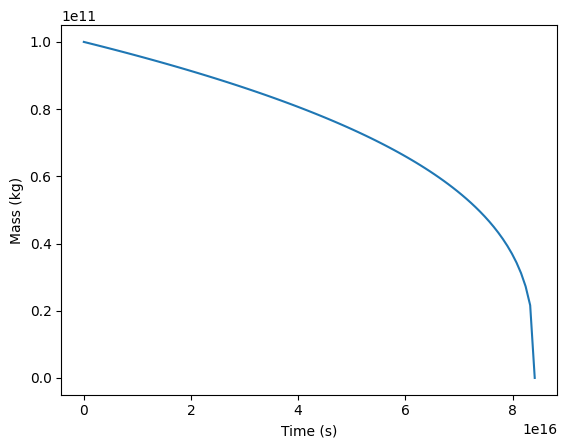

In [4]:
alpha=(hbar*c**6)/(15360*math.pi*G**2)

def decay_time(M0):
    return M0**3*c**2/3/alpha

def mass_decay(M0,t):
    return M0*(1-(3*alpha)/(c**2*M0**3)*t)**(1/3)

M0=10**11*u.kg
t=np.linspace(0,decay_time(M0),100)
M=mass_decay(M0,t)
plt.plot(t,M)
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.savefig("decay.jpg")
plt.show()

## Conservation of Angular Momentum
When a black hole starts it's evaporation process, all surrounding objects have some orbital angular momentum relative to it. Throughout the mass decay process, angular momentum must be conserved relative to every body in the universe. As mass decreases, radius increases, and this reaches infinity at the time of evaporation$^1$.

$$l=\mu v_\perp r \implies r(t)=\frac{l}{v_\perp}(\frac{1}{m}+\frac{1}{M(t)})$$

Plug in mass decay 

$$r(t)=\frac{l}{v_\perp}(\frac{1}{m}+\frac{1}{M_0}\frac{1}{(1-\frac{3\alpha}{c^2M_0^3}t)^{1/3}})$$

We can expand the complicated fraction using a taylor series

$$\frac{1}{(1-\frac{3\alpha}{c^2M_0^3}t)^{1/3}}=1+\frac{\alpha}{c^2M_0^3}t+\frac{2 \alpha^2}{c^4M_0^6}t^2+...$$

Now plug it back in and multiply by $\frac{1}{M_0}$

$$r(t)=\frac{l}{v_\perp}(\frac{1}{m}+\frac{1}{M_0}(1+\frac{\alpha}{c^2M_0^3}t+\frac{2 \alpha^2}{c^4M_0^6}t^2+...))$$

$$r(t)=\frac{l}{v_\perp}(\frac{1}{m}+\frac{1}{M_0}+\frac{\alpha}{c^2M_0^4}t+\frac{2 \alpha^2}{c^4M_0^7}t^2+...)$$

Here the expression

$$\frac{1}{m}+\frac{1}{M_0}=\frac{1}{\mu_0}$$

$$r(t)=\frac{l}{v_\perp}(\frac{1}{\mu_0}+\frac{\alpha}{c^2M_0^4}t+\frac{2 \alpha^2}{c^4M_0^7}t^2+...)$$

$$r(t)=\frac{l}{v_\perp \mu_0}(1+\frac{\alpha\mu_0}{c^2M_0^4}t+\frac{2 \alpha^2\mu_0}{c^4M_0^7}t^2+...)$$

Now we can see that the outside factor is our starting radius, $r_0$, and we finally arrive at the result

$$r(t)=r_0+\frac{\alpha\mu_0 r_0}{c^2M_0^4}t+\frac{2 \alpha^2 \mu_0 r_0}{c^4M_0^7}t^2+...$$

If the velocity component is above the speed of light, then it leaves the light cones of everything greater than the radius. There are three parameters here that can be solved numerically for combinations that would produce this effect.

$$\frac{\alpha\mu_0 r_0}{c^2M_0^4}>c$$

A reasonable combination is $M_0=10^9 kg,r_0=10^4 lyr,m=10^{30}$. In fact all masses greater than 

$^1$However, if the radial increase is greater than the speed of light, then we would never observe the full decay.

Assume that a Chandrasekhar limit black hole is flung from a galactic collision and finds itself isolated 

3.1390130347811465e-06 m / s2
396169978.3414403 m / s


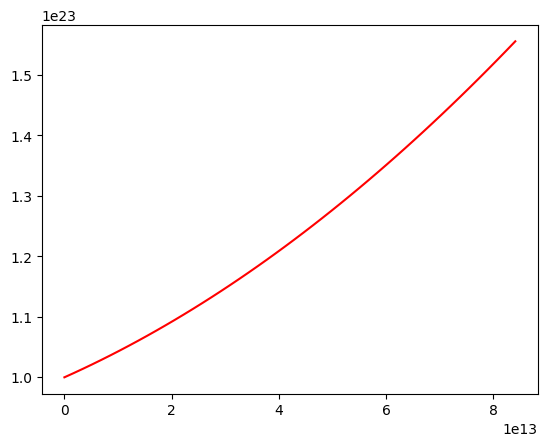

In [5]:
#parameters taken as 10^m
def acceleration(m,r0,M0):
    mu=(10**M0*10**m)/(10**M0+10**m)*u.kg
    return 2*alpha**2*mu*10**r0*u.m/(c**4*(10**M0*u.kg)**7)
    
def velocity(m,r0,M0):
    mu=(10**M0*10**m)/(10**M0+10**m)*u.kg
    return alpha*10**r0*u.m*mu/c**2/(10**M0*u.kg)**4
    
def radius(m,r0,M0,t):
    return 10**r0*u.m+velocity(m,r0,M0)*t+acceleration(m,r0,M0)*t**2

m=30
r0=23
M0=10
print(acceleration(m,r0,M0))
print(velocity(m,r0,M0))

t=np.linspace(0,decay_time(10**M0*u.kg))
r=radius(m,r0,M0,t)
plt.plot(t,r,'r')
plt.show()

In [6]:
from astropy.units import imperial
imperial.enable()
M0=9
for r0 in range(1,30):
    for m in range(1,40):
        if(velocity(m,r0,M0)+acceleration(m,r0,M0)*decay_time(10**M0*u.kg)>c):
            #m_res.append(m)
            #r_res.append(r)
            print("(r0 m)=",10**r0*u.m.to(u.lyr),"lyr",10**m*u.kg)



(r0 m)= 10570.008340246153 lyr 1000000000.0 kg
(r0 m)= 10570.008340246153 lyr 10000000000.0 kg
(r0 m)= 10570.008340246153 lyr 100000000000.0 kg
(r0 m)= 10570.008340246153 lyr 1000000000000.0 kg
(r0 m)= 10570.008340246153 lyr 10000000000000.0 kg
(r0 m)= 10570.008340246153 lyr 100000000000000.0 kg
(r0 m)= 10570.008340246153 lyr 1000000000000000.0 kg
(r0 m)= 10570.008340246153 lyr 1e+16 kg
(r0 m)= 10570.008340246153 lyr 1e+17 kg
(r0 m)= 10570.008340246153 lyr 1e+18 kg
(r0 m)= 10570.008340246153 lyr 1e+19 kg
(r0 m)= 10570.008340246153 lyr 1e+20 kg
(r0 m)= 10570.008340246153 lyr 1e+21 kg
(r0 m)= 10570.008340246153 lyr 1e+22 kg
(r0 m)= 10570.008340246153 lyr 1e+23 kg
(r0 m)= 10570.008340246153 lyr 1e+24 kg
(r0 m)= 10570.008340246153 lyr 1e+25 kg
(r0 m)= 10570.008340246153 lyr 1e+26 kg
(r0 m)= 10570.008340246153 lyr 1e+27 kg
(r0 m)= 10570.008340246153 lyr 1e+28 kg
(r0 m)= 10570.008340246153 lyr 1e+29 kg
(r0 m)= 10570.008340246153 lyr 1e+30 kg
(r0 m)= 10570.008340246153 lyr 1e+31 kg
(r0 m)= 10


(r0 m)= 10570 lyr 1e+30 kg
From and initial radius of 10000 lightyears away (the milky way galaxy is 100000 lightyears wide), our sun would be propelled away from a black hole in a vacuum and it would leave the light cone.

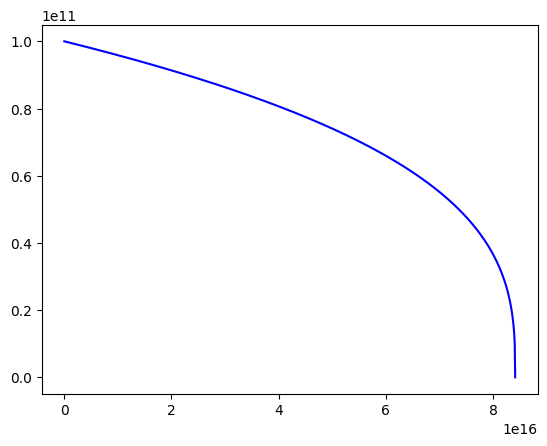

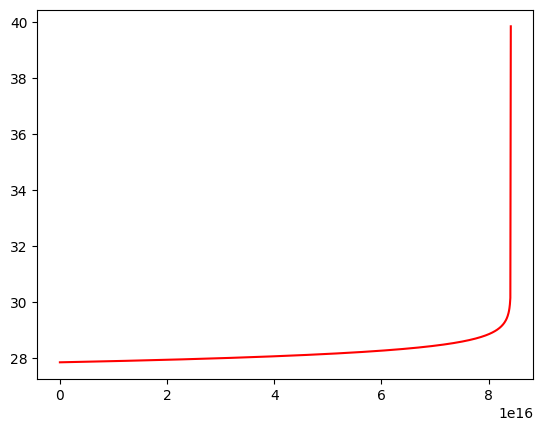

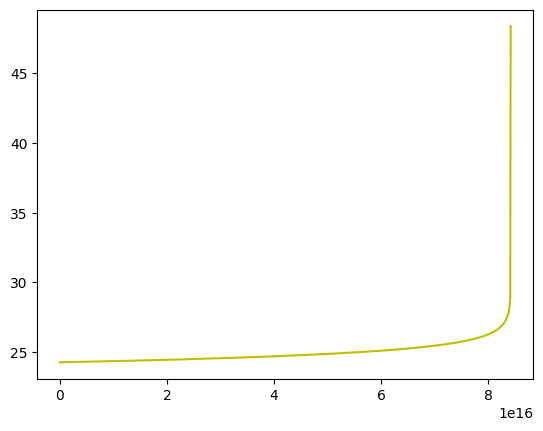

In [10]:
#Log Space
M0=1e11*u.kg
t=np.linspace(0,decay_time(M0),1000)
M=mass_decay(M0,t)

plt.plot(t,M,'b')
plt.show()

T=np.log(hawking_temperature(M)/u.K)
plt.plot(t,T,'r')
plt.show()

B=np.log(bekenstein_hawking_luminosity(M)*u.s/u.J)
plt.plot(t,B,'y')
plt.show()

In [11]:
b=3*alpha/c**2/M0**3

t=1e11*u.s
r0=1e25*u.m
M0=1e11*u.kg
m=1e10*u.kg
mu=(M0*m)/(M0+m)

v_r=b*r0*mu/3/M0
print(v_r)
a_r=4*b**2*r0*mu/18/M0
print(a_r)

3601545.2576494585 m / s
2.8536482134374066e-11 m / s2


For what values of $r_0$, $M_0$, and $\mu_0$ is the following inequality true?
$$\frac{r_0 \mu_0}{M_0^3}\ge \frac{c^3}{\alpha}$$
A program can test a phase space

In [12]:
def velocity(r0,m,M0):
    mu=(10**M0*10**m)/(10**M0+10**m)*u.kg
    return alpha*10**r0*u.m*mu/c**2/(10**M0*u.kg)**4

r_sat = []
M_sat = []
m_sat = []

for r in range(1,30):
    for M in range(1,30):
        for m in range(1,30):
            if(velocity(r,M,m) > c):
                r_sat.append(r)
                M_sat.append(M)
                m_sat.append(m)

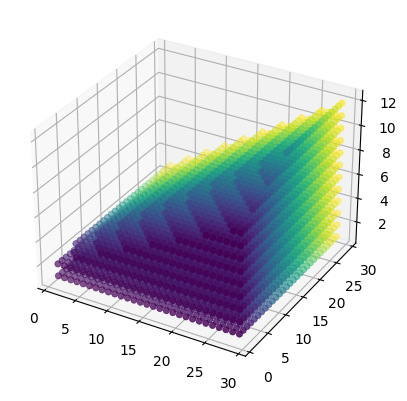

In [13]:
ax = plt.axes(projection='3d')
ax.scatter(r_sat, M_sat, m_sat, c=M_sat, cmap='viridis', linewidth=0.5);